In [57]:
import pandas as pd
import numpy as np
import sklearn.preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



In [58]:
data = pd.read_csv("/home/eric/Documents/work_python/01-Data/kaggle/housing/all/train.csv",sep=',')

In [59]:
len(data)

1460

In [60]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [62]:
data.dropna(thresh = len(data)-10,axis = 1,inplace = True)
data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [63]:

for col in data:
    if sum(data[col].isnull()>10):
        print(data[col].isnull())
        data.drop(col,axis=1,inplace=True)
data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [64]:
#dff.drop(dff.loc[:,len(dff) - dff.isnull().sum() <2], axis=1)
df=data.drop(data.loc[:,len(data)-data.isnull().sum()<3], axis = 1)
#df["PoolArea"].isnull()
#type(df["PoolArea"])
#df = df.apply(pd.to_numeric,errors='coerce')
#df.dtypes
#df["PoolArea"]
#df


In [65]:
data.drop("PoolArea",axis = 1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,30,0,320,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,57,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,204,228,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,205,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,4,0,0,0,0,1,2008,WD,Normal,118000


In [66]:
data_cat = data.select_dtypes(include = object)
data_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,BrkTil,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,Wood,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,...,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,BrkTil,GasA,Gd,Y,FuseF,TA,Min1,Y,WD,Abnorml
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,...,BrkTil,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal


In [29]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
Heating          1460 non-null object
HeatingQC        1460 non-null object
CentralAir       1460 non-null object
Electrical       14

In [67]:
data_num = data.select_dtypes(include = ['int64'])
data_num

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,14115,5,5,1993,1995,732,0,64,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,10084,8,5,2004,2005,1369,0,317,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,10382,7,6,1973,1973,859,32,216,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,6120,7,5,1931,1950,0,0,952,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,4,0,0,0,0,0,1,2008,118000


In [68]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [69]:
colname_data_cat = data_cat.columns.values.tolist()
colname_data_cat

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
data_cat_encoded = MultiColumnLabelEncoder(columns = ['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig']).fit_transform(data_cat)
#MultiColumnLabelEncoder().fit_transform(data_cat.drop('MSZoning',axis=1))

data_cat_encoded

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,3,1,3,3,0,2,Gtl,Veenker,Feedr,Norm,...,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,3,1,0,3,0,4,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,3,1,0,3,0,0,Gtl,Crawfor,Norm,Norm,...,BrkTil,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,3,1,0,3,0,2,Gtl,NoRidge,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
5,3,1,0,3,0,4,Gtl,Mitchel,Norm,Norm,...,Wood,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
6,3,1,3,3,0,4,Gtl,Somerst,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
7,3,1,0,3,0,0,Gtl,NWAmes,PosN,Norm,...,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
8,4,1,3,3,0,4,Gtl,OldTown,Artery,Norm,...,BrkTil,GasA,Gd,Y,FuseF,TA,Min1,Y,WD,Abnorml
9,3,1,3,3,0,0,Gtl,BrkSide,Artery,Artery,...,BrkTil,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal


In [72]:
data_cat_encoded = MultiColumnLabelEncoder(columns =[
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 ]).fit_transform(data_cat_encoded)
data_cat_encoded

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,Gtl,5,2,2,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,3,1,3,3,0,2,Gtl,24,1,2,...,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,3,1,0,3,0,4,Gtl,5,2,2,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,3,1,0,3,0,0,Gtl,6,2,2,...,BrkTil,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,3,1,0,3,0,2,Gtl,15,2,2,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
5,3,1,0,3,0,4,Gtl,11,2,2,...,Wood,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
6,3,1,3,3,0,4,Gtl,21,2,2,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
7,3,1,0,3,0,0,Gtl,14,4,2,...,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
8,4,1,3,3,0,4,Gtl,17,0,2,...,BrkTil,GasA,Gd,Y,FuseF,TA,Min1,Y,WD,Abnorml
9,3,1,3,3,0,0,Gtl,3,0,0,...,BrkTil,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal


In [84]:
data_cat_encoded.drop(['Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition'],axis=1)
#data_cat_encoded = MultiColumnLabelEncoder(columns =[
# 'Heating',
# 'HeatingQC',
# 'CentralAir',
# 'Electrical']).fit_transform(data_cat_encoded)
data_cat_encoded

#encoder
#data_cat_encoded = MultiColumnLabelEncoder(columns =[
# 'Electrical']).fit_transform(data_cat_encoded)
#data_cat_encoded

#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#data_cat_encoded = data_cat.apply(encoder.fit_transform)
#data_cat_encoded = encoder.fit_transform(data_cat.iloc[:,1:])
#data_cat_encoded

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,Gtl,5,2,2,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,3,1,3,3,0,2,Gtl,24,1,2,...,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,3,1,0,3,0,4,Gtl,5,2,2,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,3,1,0,3,0,0,Gtl,6,2,2,...,BrkTil,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,3,1,0,3,0,2,Gtl,15,2,2,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
5,3,1,0,3,0,4,Gtl,11,2,2,...,Wood,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
6,3,1,3,3,0,4,Gtl,21,2,2,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
7,3,1,0,3,0,0,Gtl,14,4,2,...,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
8,4,1,3,3,0,4,Gtl,17,0,2,...,BrkTil,GasA,Gd,Y,FuseF,TA,Min1,Y,WD,Abnorml
9,3,1,3,3,0,0,Gtl,3,0,0,...,BrkTil,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal


In [86]:
data_cat_encoded = data_cat_encoded.select_dtypes(include = ['int64'])
data_cat_encoded

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd
0,3,1,3,3,0,4,5,2,2,0,5,1,1,12,13
1,3,1,3,3,0,2,24,1,2,0,2,1,1,8,8
2,3,1,0,3,0,4,5,2,2,0,5,1,1,12,13
3,3,1,0,3,0,0,6,2,2,0,5,1,1,13,15
4,3,1,0,3,0,2,15,2,2,0,5,1,1,12,13
5,3,1,0,3,0,4,11,2,2,0,0,1,1,12,13
6,3,1,3,3,0,4,21,2,2,0,2,1,1,12,13
7,3,1,0,3,0,0,14,4,2,0,5,1,1,6,6
8,4,1,3,3,0,4,17,0,2,0,0,1,1,3,15
9,3,1,3,3,0,0,3,0,0,1,1,1,1,8,8


In [74]:
data_num

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,14115,5,5,1993,1995,732,0,64,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,10084,8,5,2004,2005,1369,0,317,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,10382,7,6,1973,1973,859,32,216,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,6120,7,5,1931,1950,0,0,952,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,4,0,0,0,0,0,1,2008,118000


In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_num_std = scaler.fit_transform(data_num)
data_num_std

/usr/lib64/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/lib64/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.73086488,  0.07337496, -0.20714171, ..., -1.5991111 ,
         0.13877749,  0.34727322],
       [-1.7284922 , -0.87256276, -0.09188637, ..., -0.48911005,
        -0.61443862,  0.00728832],
       [-1.72611953,  0.07337496,  0.07347998, ...,  0.99089135,
         0.13877749,  0.53615372],
       ...,
       [ 1.72611953,  0.30985939, -0.14781027, ..., -0.48911005,
         1.64520971,  1.07761115],
       [ 1.7284922 , -0.87256276, -0.08016039, ..., -0.8591104 ,
         1.64520971, -0.48852299],
       [ 1.73086488, -0.87256276, -0.05811155, ..., -0.1191097 ,
         0.13877749, -0.42084081]])

In [79]:
data_num_train = pd.DataFrame(data_num_std,columns = data_num.columns)
data_num_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.730865,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-1.728492,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,-1.726120,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,-1.723747,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,-1.721374,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,-0.174865,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843
5,-1.719002,-0.163109,0.360616,-0.795151,-0.517200,0.719786,0.491040,0.632450,-0.288653,-1.139286,...,-0.432931,-0.251539,-0.359325,10.802446,-0.270208,-0.068692,1.323736,1.360892,0.891994,-0.477505
6,-1.716629,-0.872563,-0.043379,1.374795,-0.517200,1.084115,0.975575,2.029558,-0.288653,-0.566519,...,1.283007,0.156111,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,1.587588
7,-1.714256,0.073375,-0.013513,0.651479,0.381743,0.057371,-0.574938,0.910994,-0.090220,-0.795173,...,1.123385,2.375537,3.372372,-0.116339,-0.270208,-0.068692,0.618024,1.730892,0.891994,0.240241
8,-1.711883,-0.163109,-0.440659,0.651479,-0.517200,-1.333700,-1.689368,-0.973018,-0.288653,0.871057,...,-0.033876,-0.704483,2.995929,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,0.138777,-0.642461
9,-1.709511,3.147673,-0.310370,-0.795151,0.381743,-1.068734,-1.689368,0.893448,-0.288653,-0.967230,...,-0.752176,-0.644091,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.969111,0.138777,-0.792306


In [93]:
data_prep = pd.concat([data_num_train,data_cat_encoded],axis=1)
data_prep

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd
0,-1.730865,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,...,4,5,2,2,0,5,1,1,12,13
1,-1.728492,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,...,2,24,1,2,0,2,1,1,8,8
2,-1.726120,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,...,4,5,2,2,0,5,1,1,12,13
3,-1.723747,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,...,0,6,2,2,0,5,1,1,13,15
4,-1.721374,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,-0.174865,...,2,15,2,2,0,5,1,1,12,13
5,-1.719002,-0.163109,0.360616,-0.795151,-0.517200,0.719786,0.491040,0.632450,-0.288653,-1.139286,...,4,11,2,2,0,0,1,1,12,13
6,-1.716629,-0.872563,-0.043379,1.374795,-0.517200,1.084115,0.975575,2.029558,-0.288653,-0.566519,...,4,21,2,2,0,2,1,1,12,13
7,-1.714256,0.073375,-0.013513,0.651479,0.381743,0.057371,-0.574938,0.910994,-0.090220,-0.795173,...,0,14,4,2,0,5,1,1,6,6
8,-1.711883,-0.163109,-0.440659,0.651479,-0.517200,-1.333700,-1.689368,-0.973018,-0.288653,0.871057,...,4,17,0,2,0,0,1,1,3,15
9,-1.709511,3.147673,-0.310370,-0.795151,0.381743,-1.068734,-1.689368,0.893448,-0.288653,-0.967230,...,0,3,0,0,1,1,1,1,8,8


In [101]:
X = data_prep.drop(['SalePrice'], axis = 1)
X

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd
0,-1.730865,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,...,4,5,2,2,0,5,1,1,12,13
1,-1.728492,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,...,2,24,1,2,0,2,1,1,8,8
2,-1.726120,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,...,4,5,2,2,0,5,1,1,12,13
3,-1.723747,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,...,0,6,2,2,0,5,1,1,13,15
4,-1.721374,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,-0.174865,...,2,15,2,2,0,5,1,1,12,13
5,-1.719002,-0.163109,0.360616,-0.795151,-0.517200,0.719786,0.491040,0.632450,-0.288653,-1.139286,...,4,11,2,2,0,0,1,1,12,13
6,-1.716629,-0.872563,-0.043379,1.374795,-0.517200,1.084115,0.975575,2.029558,-0.288653,-0.566519,...,4,21,2,2,0,2,1,1,12,13
7,-1.714256,0.073375,-0.013513,0.651479,0.381743,0.057371,-0.574938,0.910994,-0.090220,-0.795173,...,0,14,4,2,0,5,1,1,6,6
8,-1.711883,-0.163109,-0.440659,0.651479,-0.517200,-1.333700,-1.689368,-0.973018,-0.288653,0.871057,...,4,17,0,2,0,0,1,1,3,15
9,-1.709511,3.147673,-0.310370,-0.795151,0.381743,-1.068734,-1.689368,0.893448,-0.288653,-0.967230,...,0,3,0,0,1,1,1,1,8,8


In [103]:
y = data_prep['SalePrice']

0       0.347273
1       0.007288
2       0.536154
3      -0.515281
4       0.869843
5      -0.477505
6       1.587588
7       0.240241
8      -0.642461
9      -0.792306
10     -0.647497
11      2.066086
12     -0.464913
13      1.241308
14     -0.301216
15     -0.616017
16     -0.401953
17     -1.144883
18     -0.276032
19     -0.527873
20      1.818023
21     -0.522836
22      0.618002
23     -0.642461
24     -0.338993
25      0.949172
26     -0.580760
27      1.574996
28      0.334681
29     -1.415611
          ...   
1430    0.141268
1431   -0.468061
1432   -1.465980
1433    0.070248
1434   -0.263440
1435   -0.087152
1436   -0.760826
1437    2.690865
1438   -0.393138
1439    0.202465
1440    0.126913
1441   -0.398175
1442    1.625365
1443   -0.754530
1444   -0.016637
1445   -0.653793
1446   -0.289884
1447    0.743922
1448   -0.867858
1449   -1.119699
1450   -0.565649
1451    1.336881
1452   -0.452321
1453   -1.214139
1454    0.051360
1455   -0.074560
1456    0.366161
1457    1.0776

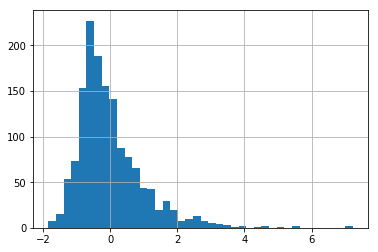

In [105]:
#tracer le niveau de prix pour savoir s il faut un echantillonage stratifie ou pas 
import matplotlib.pyplot as plt
y.hist(bins = 40)
plt.show()
#on voit que la distribution n'est pas uniforme. Donc un échantillonage aleatoire ne convient pas

In [114]:
from pandas.plotting import scatter_matrix
X_cor = X.corr()
c1 = X_cor.abs().unstack().sort_values().drop_duplicates()
c1.sort_values(ascending = False)
#X_cor

Id            Id              1.000000
GarageCars    GarageArea      0.882475
Exterior2nd   Exterior1st     0.854163
TotRmsAbvGrd  GrLivArea       0.825489
TotalBsmtSF   1stFlrSF        0.819530
BldgType      MSSubClass      0.746063
GrLivArea     2ndFlrSF        0.687501
BedroomAbvGr  TotRmsAbvGrd    0.676620
BsmtFinSF1    BsmtFullBath    0.649212
FullBath      GrLivArea       0.630012
TotRmsAbvGrd  2ndFlrSF        0.616423
2ndFlrSF      HalfBath        0.609707
GarageCars    OverallQual     0.600671
GrLivArea     OverallQual     0.593007
YearRemodAdd  YearBuilt       0.592855
OverallQual   YearBuilt       0.572323
GrLivArea     1stFlrSF        0.566024
OverallQual   GarageArea      0.562022
TotRmsAbvGrd  FullBath        0.554784
YearRemodAdd  OverallQual     0.550684
FullBath      OverallQual     0.550600
YearBuilt     GarageCars      0.537850
TotalBsmtSF   OverallQual     0.537808
              BsmtFinSF1      0.522396
BedroomAbvGr  GrLivArea       0.521270
2ndFlrSF      BedroomAbvG

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f069a07ec50>,
      dtype=object)

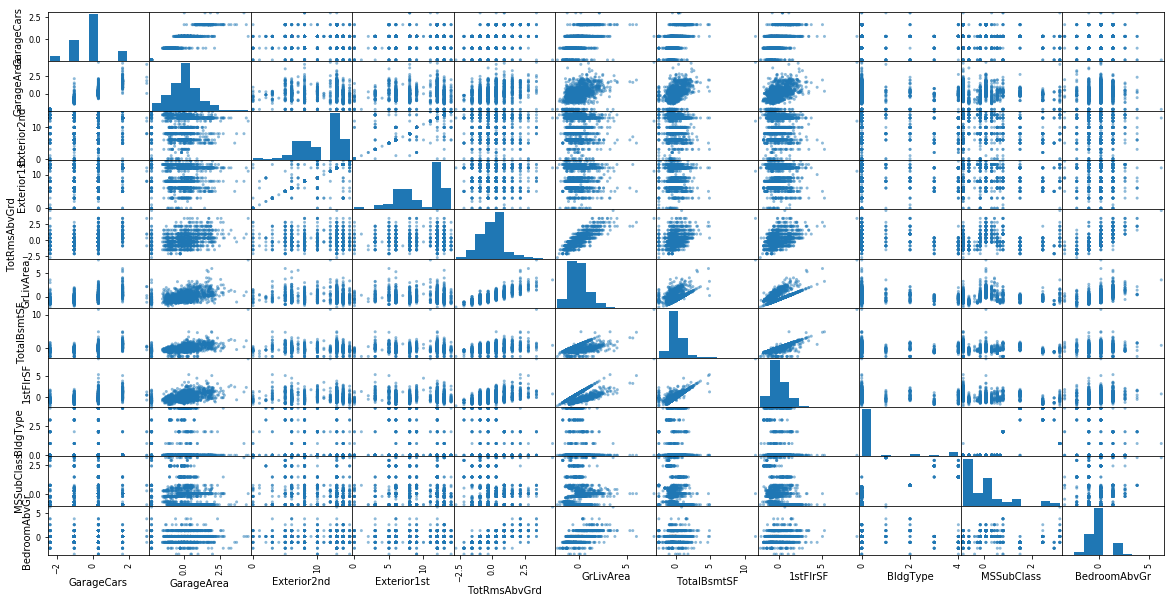

In [121]:
attributes = ['GarageCars','GarageArea','Exterior2nd','Exterior1st','TotRmsAbvGrd','GrLivArea','TotalBsmtSF','1stFlrSF','BldgType','MSSubClass','BedroomAbvGr']
scatter_matrix(X[attributes],figsize=(20,10))

KeyError: '1stFlrSF'